<a href="https://colab.research.google.com/github/ilyas122/CMPE_255-Data-Mining/blob/main/assignment_4_Mohammed_Ilyas_Ahmeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('data_kmeans.csv')
dataset.describe()

,1.8421,4.6076
count,299.000000,299.000000
mean,3.690537,2.981682
std,1.925842,1.685283
min,-0.245130,0.205810
25%,2.163150,1.205950
50%,3.232000,2.949700
75%,5.516050,4.808850
max,8.203400,5.784300


In [ ]:
X = dataset.iloc[:, [0,1]].values


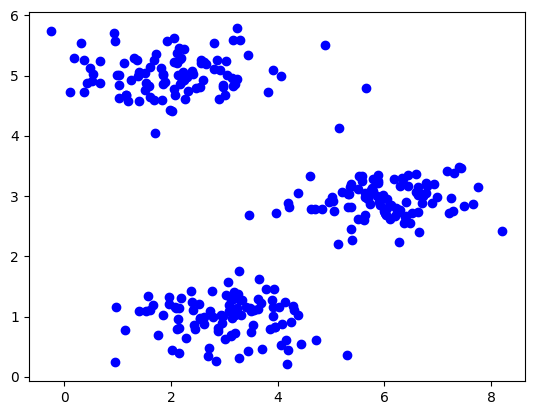

In [ ]:
plotx = []
ploty = []
for i in range(len(X)):
    plotx.append(X[i][0])
    ploty.append(X[i][1])
plt.plot(plotx,ploty, 'bo')

In [ ]:
# Perform K-means clustering with k = 3
k = 3
centroids = X[np.random.choice(X.shape[0], k, replace=False)]


In [ ]:
def assign_clusters(X, centroids):
  # Assign data points to the nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(centroids,X):
  for j in range(k):
        centroids[j] = np.mean(X[cluster_labels == j], axis=0)

for i in range(10):
    cluster_labels = assign_clusters(X,centroids)
    update_centroids(centroids,X)



In [ ]:
print("Final cluster centroids:\n", centroids)

Final cluster centroids:
 [[3.04367196 1.01540912]
 [1.95514897 5.02988041]
 [6.033667   3.000527  ]]


In [ ]:
print("Final cluster labels:\n", cluster_labels)

Final cluster labels:
 [2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1]


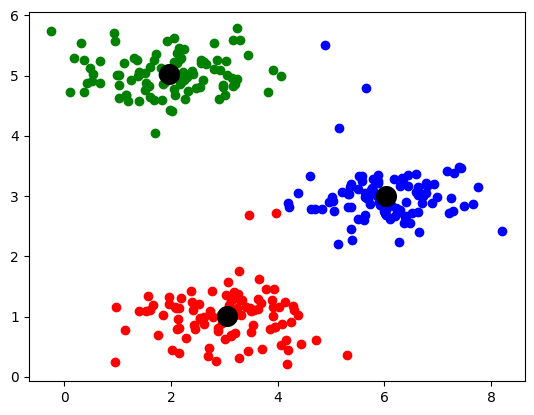

In [ ]:
# Plot the data points with different colors corresponding to their respective clusters
colors = ['r', 'g', 'b']
for i in range(k):
    cluster = X[cluster_labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i])

# Plot the final centroids as black circles
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='k')

plt.show()

2. Answer

In [4]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

In [5]:
# Download iris data
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names"

urllib.request.urlretrieve(url_data, "iris.data")
urllib.request.urlretrieve(url_names, "iris.names")

('iris.names', <http.client.HTTPMessage at 0x7f3c72e676d0>)

In [6]:
# Load data into a pandas dataframe
iris = pd.read_csv("iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [7]:
# Compute descriptive statistics
print("Descriptive statistics for each column:")
print(iris.describe())



Descriptive statistics for each column:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# Standardize the data
X = iris.iloc[:, 0:4]
X_standardized = (X - X.mean()) / X.std()

In [9]:
# Compute SVD
U, s, VT = np.linalg.svd(X_standardized, full_matrices=False)

In [10]:
# Compute principal components
PC = VT.T

In [11]:
# Project data onto principal components
X_projected = np.dot(X_standardized, PC[:, :2])

In [12]:
# Create a dictionary for colors
color_dict = {"Iris-setosa": "r", "Iris-versicolor": "g", "Iris-virginica": "b"}

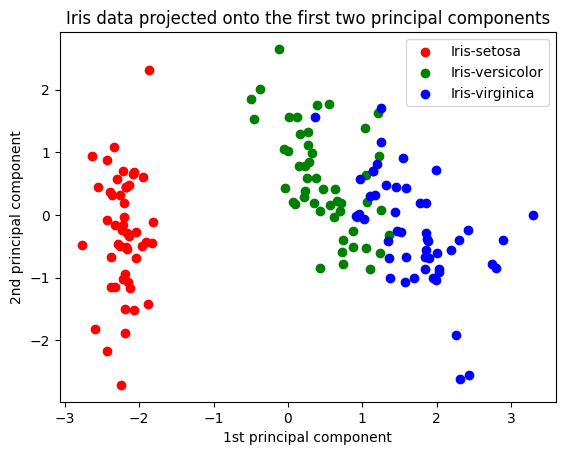

In [13]:
# Plot data
plt.figure()
for label, color in color_dict.items():
    indices = iris["class"] == label
    plt.scatter(X_projected[indices, 0], X_projected[indices, 1], c=color, label=label)

plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("Iris data projected onto the first two principal components")
plt.legend()
plt.show()